# Script to evaluate model spatial prediction accuracy 

This script evaluates the overall and spatial accuacy of SWEMLv2.0

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib
import warnings
import SSWEET

HOME = os.path.expanduser('~')


In [49]:
#Model run
output_res = '300M_Resolution'
DataFrame = 'Sturm_Seasonality_PrecipVIIRSGeoObsDFs'
fSCA_thresh = '20_fSCA_Thresh'

#Prediction path
Ppath = f"{HOME}/SWEMLv2.0/Predictions/{DataFrame}/{output_res}/{fSCA_thresh}"

#Load data
EvalDF = pd.read_parquet(f"{Ppath}/HoldOut_03-29-2019.parquet")

#Change obs/pred column names if necessary
EvalDF.rename(columns={'ASO_swe_cm':'y_test','XGBoost_swe_cm':'y_pred'}, inplace=True)

EvalDF.head(5)

,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,ns_3,...,Seasonal_ns_3_rel,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,swe_cm,region,region_class,y_test,y_pred
0,Southwest_300M_37.65_-119.475,2019-03-29,37.650,-119.475,3019,65,260,122.2,103.0,145.1,...,2.358723,-0.525764,-0.046508,-0.051135,8,85.088968,Southwest,2,85.088968,133.046341
1,Southwest_300M_37.596_-119.518,2019-03-29,37.596,-119.518,2804,46,261,145.1,103.0,122.2,...,2.066611,-0.051135,-0.046508,-0.525764,8,187.475502,Southwest,2,187.475502,142.495743
2,Southwest_300M_37.772_-119.626,2019-03-29,37.772,-119.626,2316,15,352,130.4,92.4,87.0,...,-0.525764,1.821781,1.598129,1.503276,8,124.055254,Southwest,2,124.055254,131.993942
3,Southwest_300M_37.772_-119.629,2019-03-29,37.772,-119.629,2327,41,280,130.4,92.4,87.0,...,-0.525764,1.821781,1.598129,1.503276,8,138.244832,Southwest,2,138.244832,126.244492
4,Southwest_300M_37.772_-119.631,2019-03-29,37.772,-119.631,2230,34,30,130.4,92.4,87.0,...,-0.525764,1.821781,1.598129,1.503276,8,132.539642,Southwest,2,132.539642,126.561134


## Parity Plot

A parity plot is a scatterplot that compares a set of model estimates against benchmark data, i.e., the observations. Each point has coordinates (x, y), where x is a benchmark value and y is the corresponding value from the model. A parity plot is often the first visualization to investigate the skill of a model.

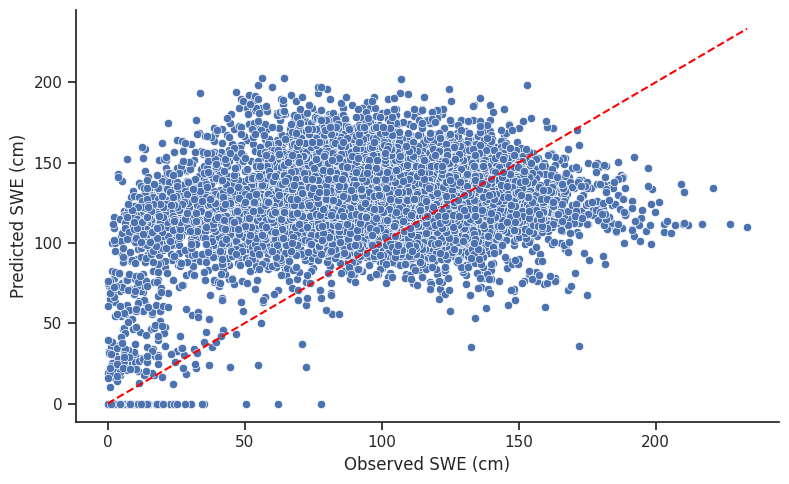

,R2,RMSE,KGE,PBias,R2_fSCA,RMSE_fSCA,KGE_fSCA,PBias_fSCA
0,-0.36,46.65,0.39,-29.49,-0.36,46.65,0.39,-29.49


In [50]:
Performance = SSWEET.parityplot(EvalDF)
Performance

## Percent Error compared to elevation
*note, error greater than |100%| is adjusted to |100%|

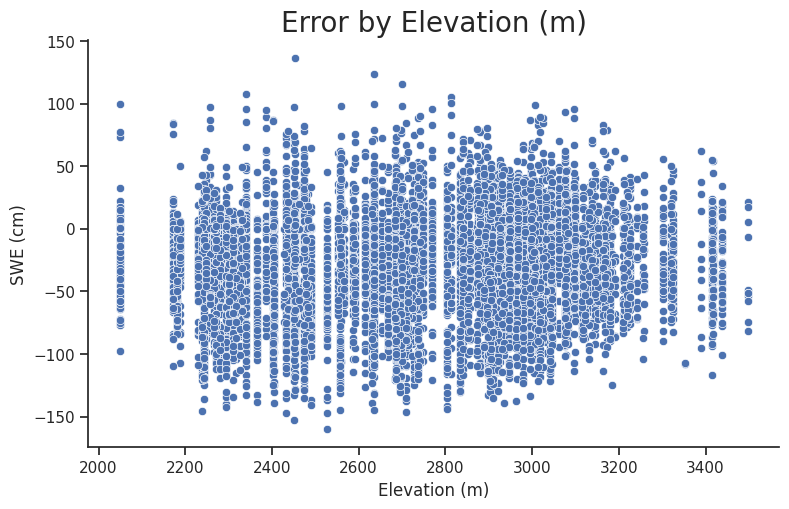

In [20]:
SSWEET.Model_Vs(EvalDF,'Elevation_m', 'Error')

# Spatial Evaluation of the Model

In [51]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

def SpatialAnalysis(EvalDF):
    #Convert to a geopandas DF
    Pred_Geo = gpd.GeoDataFrame(EvalDF, geometry = gpd.points_from_xy(EvalDF.cen_lon, EvalDF.cen_lat))

    #get error value
    Pred_Geo['y_error'] = Pred_Geo['y_test'] - Pred_Geo['y_pred']


    fig, ax = plt.subplots(1, 3)

    Pred_Geo.plot(column='Elevation_m',
                  ax = ax[0],
                  legend=False,
                )
    
    # Pred_Geo.plot(column='y_test',
    #               ax = ax[1],
    #               legend=False)
    
    # Pred_Geo.plot(column='y_error',
    #               ax = ax[2],
    #               legend=True,
    #               legend_kwds={"label": "SWE (cm)", "orientation": "vertical"})


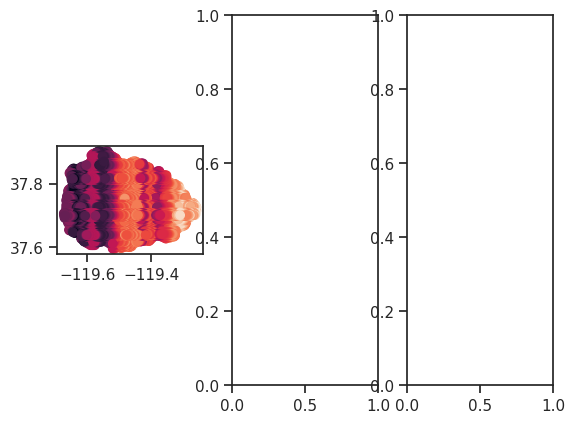

In [52]:
SpatialAnalysis(EvalDF)